# **Exercise**
* ### By leveraging the perceptron class, implement a new class adaline, and modifiy the corresponding fit method to implement the adaline learning rule
* ### Test it on iris data
* ### What do you observe?

# Introduction to Keras
* Keras is an open source deep learning framework for Python

* It provides high-level building blocks for developing deep learning models

* It has been developed by an artificial intelligence researcher at Google named Francois Chollet

* Currently used by many leading companies




# What is Keras
* Keras is a high-level interface for more specialized, well-optimized tensor manipulation libraries
  * Such libraires serve as the **backend engine** of Keras
    * TensorFlow, or Microsoft Cognitive Toolkit (CNTK), or Theano

* It does not handle itself low-level operations such as tensor products, convolutions and so on

* It was developed with a focus on enabling fast experimentation

# Tensorflow: a sketch

* Open source software library

* Intensely optimized for fast Numerical computations

* Widely used for Machine Learning/Deep Learning

* First public release, TensorFlow 1.0.0, 2017

* Based on *tensors*: Generalization of vectors and matrices to potentially higher dimensions
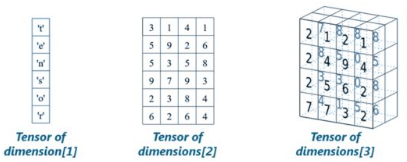

* Everything is a tensor!
  * A scalar is a tensor of dimension 0
  * A vector is a tensor of dimension 1
  A matrix is a tensor of dimension 2
* Say you have N images, each of size H x W - represent that as a tensor of dimension N x H x W  

# TensorFlow is quite literally the flow of tensors

* Symbolic tensor manipulation framework developed by Google

* The idea of a computational graph is central to TensorFlow

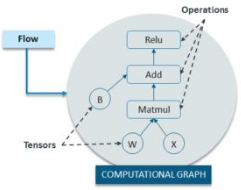

# It is based on symbolic operations

* ### operations on **placeholders**
* ### Lazy execution delays evaluation as much as possible.
    * #### In context of TensorFlow, it will create a plan of execution (a graph) before it does anything
    * #### Then when everything is ready, it will feed the input into the graph and calculate and return the output
* ### Eager execution instead evaluates immediately. In context of TensorFlow, it does not create a graph.   

In [3]:
import numpy as np
import tensorflow.compat.v1 as tf
print("TensorFlow version:", tf.__version__)
## disabling eager execution
tf.compat.v1.disable_eager_execution()
# declare a placeholder for the first operand (tensor):
# actual data provided at runtime
operand1 = tf.placeholder(tf.float32)
# declare a placeholder for the second operand (tensor):
operand2 = tf.placeholder(tf.float32)
# result will be a tensor - result of addition of operand1 and
#  operand 2
operation = tf.add(operand1, operand2, name="float32Add")
# A Session object encapsulates the environment in which
#  Operation objects are executed, and Tensor objects are evaluated.
with tf.Session() as sess:
    res = sess.run(operation, # here we can pass feed real data
                   feed_dict={operand1:[1.5, 2, 2.9],
                              operand2:[0, 1, -1]})
    print(f"Value of operation:{res}")
    print(f"Node operation iteself:{operation}, \n {operation.op}")

ModuleNotFoundError: No module named 'tensorflow'

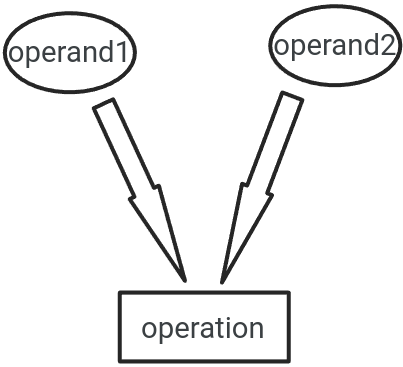

# In Tensorflow 2.0 not necessary anymore to define placeholder to run computations

* # Eager computation: allows to direct invoke the operand

* # less efficient: used just for interactive computation
* # tf.enable_eager_execution() must be called at program startup, **let's restart the session**, the run the cell below

In [1]:
import tensorflow.compat.v1 as tf
tf.compat.v1.enable_eager_execution()

operand1 = [1.5, 2, 2.9]
operand2 = [0, 1, -1]
tf.add(operand1, operand2)



<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.5      , 3.       , 1.9000001], dtype=float32)>

* # Tensorflow low level operation are hidden when programming with Keras
* # We can import keras directly or import tensorflow.keras
* # Since the Keras release 2.3.0 Keras and tensorflow.keras are in sync  
* # Let's restart the session to run tensorflow not in eager mode



In [9]:
import tensorflow as tf
import keras as K
print( K.__version__ )
print( tf.__version__)
#

3.8.0
2.18.0


# Keras models accept three types of inputs:
 * ### **NumPy arrays**, just like Scikit-Learn
 * ### **TensorFlow Dataset objects**
 * ### **Python generators** that yield batches of data

# Let's use Keras to build a our first MLP!


# TASK: to classify MNIST handwritten digits

# Keras has its own ``dataset`` module
 * ## We load the MNIST dataset from it

In [10]:
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"X_train.shape:{X_train.shape},\
    X_train type :{type(X_train)}")
print(f"X_test.shape:{X_test.shape},\
    X_test type :{type(X_test)}")


X_train.shape:(60000, 28, 28),    X_train type :<class 'numpy.ndarray'>
X_test.shape:(10000, 28, 28),    X_test type :<class 'numpy.ndarray'>


# We have 60000 samples in our training set belonging to 10 classes
 * ### The images are $28$ x $28$ pixels each
 * ### Labels are integers from $0$ to $9$

 * ### We can confirm this by plotting the first sample in matplotlib:

unique classes:[0 1 2 3 4 5 6 7 8 9]
[5]


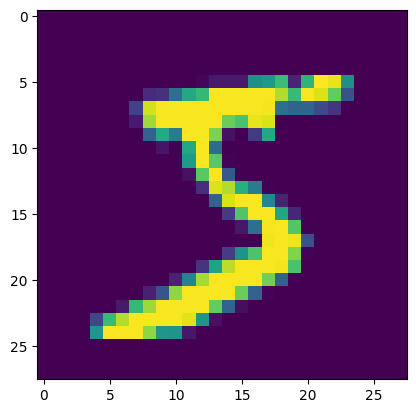

In [11]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])
print(f"unique classes:{np.unique(y_train)}")
print(y_train[:1])

# MLP takes vectors as inputs
# How to make images into MLP input?
  * ### Simply, we vectorize them using the `reshape()` method

In [12]:
# reshaping all the training, testing dataset, by removing one dimension
X_train = X_train.reshape(-1, 28*28)
print(f"X_train.shape:{X_train.shape}")
X_test = X_test.reshape(-1, 28*28)
# keras models need float32 inputs
print(f"X_train.dtype:{X_train.dtype}")
X_train = X_train.astype('float32')
print(f"X_train.dtype:{X_train.dtype}")
X_test = X_test.astype('float32')

X_train.shape:(60000, 784)
X_train.dtype:uint8
X_train.dtype:float32


# **Keras Sequential Model**

 * ## Sequential model is basically a linear composition of **Keras Layers**
    * ### It creates a FFNN

 * ## This is simply a linear stack of neural network layers, and it’s perfect for the type of feed-forward model like MLP
 * ## We  now import the **Sequential** model type from Keras and the first layer type **Dense**
    * ### a fully-connected layer, like in MLP

In [13]:
from tensorflow.keras.models import Sequential
# dense is a fully connected layer
from tensorflow.keras.layers import Dense

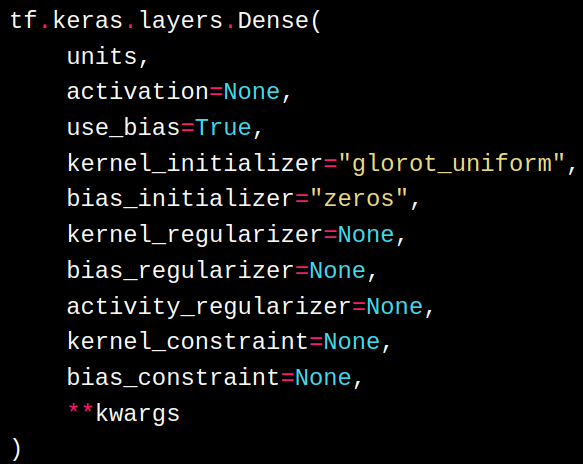

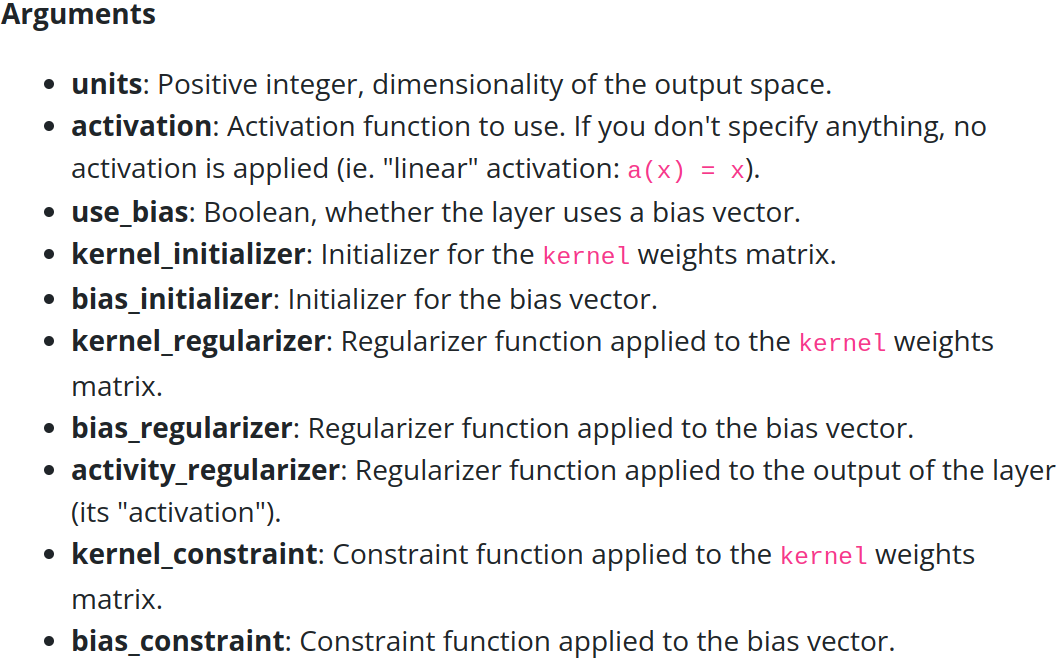

In [14]:
import numpy as np
np.random.seed(42)  # for reproducibility
tf.random.set_seed(42)
num_classes = len(np.unique(y_train))
print(f"Number of classes classes:{num_classes}")
# create a Sequential model
model = Sequential(    [
        # First hidden layer. Input data with size 28*28 and output size 256
        #   256 means you set up this layer with 256 hidden neurons.
        #   Such a value is up to you, typically an hyper-parameter
        # input_shape must be specified just for the first hidden layer
        # in (28*28,) the comma indicates the dimension of the batches,
        #     unknowkn during the implementation
        Dense(256, input_shape=(28*28,), activation='sigmoid'),

        # Second hidden layer. Input data with size 256,
        #    which were same to output of the first hidden layer.
        #    output size 128, we set up 128 neurons  in this hidden layer.
        # No need to give input size here because keras gets it automatically.
        Dense(128, activation='sigmoid'),

        # output layer. the number of output should be your number
        #    of classification
        # Softmax for multiclass classification
        Dense(num_classes, activation='softmax')
    ]
)


Number of classes classes:10


# Alternately, we can define the model and then the `add()` method to add layers

In [15]:
np.random.seed(42)  # for reproducibility
tf.random.set_seed(42)
## alternative definition usinf Sequential.add()
model = Sequential()
model.add(Dense(256, input_shape=(28*28,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

# Third alternative, we can use the `tensorflow.keras.Model` class, along with an `tensorflow.keras.Input` class
* ## This alternative is useful when we need to define models with **mulitple inputs** and/or **multiple outputs**

In [16]:
np.random.seed(42)  # for reproducibility
tf.random.set_seed(42)
input = tf.keras.Input(shape=(28*28,))
hid = tf.keras.layers.Dense(256, activation='sigmoid')(input)
hid = tf.keras.layers.Dense(128, activation='sigmoid')(hid)
output = tf.keras.layers.Dense(num_classes,
                                       activation='sigmoid')(hid)
model = tf.keras.Model(input, output)

In [17]:
# # print out model structure
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

# **Number of Parameters**
 * # First layer: **input size** = 784+1(+1 for bias), **output size** = 256. we have totally (784+1)* 256 = 200960 parameters

 * # Second layer: **input size** = 256 + 1, **output size** = 128. We have totally (256+1)* 128 = 32896 parameters

 * # output layer: **input size** = 128 + 1, **output size** = 10. We have totally (128+1)* 10 = 1290 parameters

# **Compile the model** ([documentation](https://colab.research.google.com/drive/1mjAIGnYMXY5IbOeZKXRTF2_T7Y1huwED?authuser=1#scrollTo=1ji5wF0JBfar&line=1&uniqifier=1) )

* ## Keras Model class provides a method, **compile()** to compile the model
* ## It transform the model into a computational graph (possibly static), to get best execution performance

* ## The argument and default value of the compile() method is as follows:
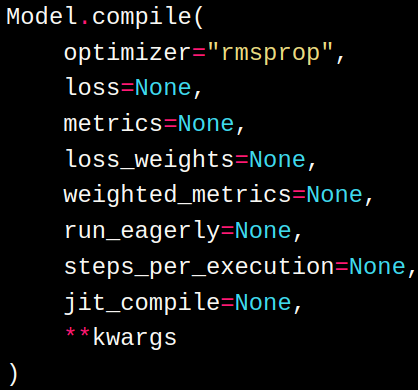

* ## **optimizer**: String (name of optimizer) or optimizer instance. See tf.keras.optimizers

* ## **loss**: Loss function. May be a string (name of loss function), or a tf.keras.losses.Loss instance. See tf.keras.losses

* ## **metrics**: List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. See tf.keras.metrics.

In [18]:
model.compile(optimizer='SGD', # stocastic gradient descent
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **sparse_categorical_crossentropy**

* ## it is the *cross entropy* (CE) loss, the *sparse* stands for automatic tranformation of the labels into one-hot vectors
    * ### we do not need to transform them manually
    * ### we can provide the integer labels 0,...,9
* ## As we'll see in next lecture, CE is suitable for multiclass classification

* ## We expect labels to be provided as integers
 * ### If you want to provide labels using one-hot representation, please use **CategoricalCrossentropy** loss

# **Fitting/Training the model** ([documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit) )

* ## We invoke the method fit on the Model instance

* ## The whole training is hidden!

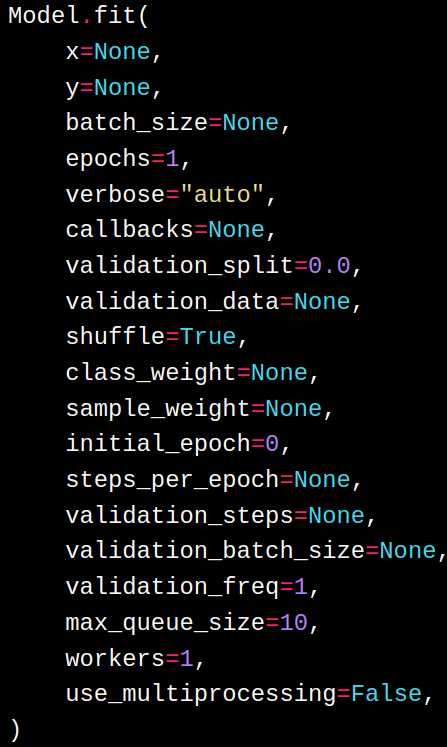


In [19]:
batch_size = 64
epochs = 10
model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size = batch_size,
                    validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5424 - loss: 1.8699 - val_accuracy: 0.8510 - val_loss: 0.9069
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8403 - loss: 0.8330 - val_accuracy: 0.8998 - val_loss: 0.5213
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8818 - loss: 0.5405 - val_accuracy: 0.9152 - val_loss: 0.3837
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8974 - loss: 0.4258 - val_accuracy: 0.9248 - val_loss: 0.3199
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9072 - loss: 0.3657 - val_accuracy: 0.9317 - val_loss: 0.2791
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9150 - loss: 0.3244 - val_accuracy: 0.9372 - val_loss: 0.2520
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9211 - loss: 0.2941 - val_accuracy: 0.9430 - val_loss: 0.2314
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9272 - loss: 0.2712 - val_accuracy: 0.

# Predict test data


In [20]:
pred = model.predict(X_test)
print(f"pred.shape:{pred.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
pred.shape:(10000, 10)


In [22]:
# getting categorical prediction
#  the output neuron with maximum value (among the 10 neurons)
#   corresponds to the prediction.
print(f"Example of softmax prediction: {pred[0]}")
cat_pred = np.argmax(pred, axis=1)
print(f"cat_pred.shape:{cat_pred.shape}")
print(cat_pred[0])

Example of softmax prediction: [0.41798085 0.20518881 0.38423917 0.89550185 0.12372289 0.27154556
 0.00681541 0.99932456 0.1706846  0.85387224]
cat_pred.shape:(10000,)
7


In [23]:
# Compute the test accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, cat_pred))

0.9383


# **Exercise**
* ## Split the training data into train and validation sets (use for instance 80% and 20%)
* ## Operate a model selection for the following hyper-parameters
  1. ### **number of layers**, for instance try (1 or 2 hidden layers)
  2. ### **Number of hidden units** fixed the numer of layers (128 or 256)
  3. ### **Batch size** (try 32 or 128). What main  differences do you observe?

* ## Evaluate if the number of epochs is large enough

# **What to do**:
1. ### Splid training data into train and validation sets (see cell below)
2. ### Fix a set of possible configurations of all hyper-parameters
3. ### Loop over any possible configuration
    * #### for any config, train a model on training data
    * #### Evaluate the performance on validation data
    * #### Pic the configuration having the highest accuracy on validation data
4. ### Merge again train and validation data to get a unique training set
5. ### Train the final model with the chosen configuration and evaluate it on the test set

In [24]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_lab, val_lab = train_test_split(X_train, y_train,
                                                            test_size=0.2)

print(f"train_data.shape:{train_data.shape},val_data.shape:{val_data.shape}")
print(f"train_lab.shape:{train_lab.shape},val_lab.shape:{val_lab.shape}")

train_data.shape:(48000, 784),val_data.shape:(12000, 784)
train_lab.shape:(48000,),val_lab.shape:(12000,)


In [ ]:
## use following code to merge againg train and validation data for the final training

#X_train = np.concatenate([train_data, val_data])
#y_train = np.concatenate([train_lab, test_lab])


# **For the Interested reader, let's explore the fit() function**

 * ## Let's redefine the fit content line by line

 * ## We define a custom model subclass of ``tf.keras.Model`` class

 * ### Need to redefine the ``train_step`` method

In [25]:
import tensorflow
class CustomModel(tensorflow.keras.Model):
    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data
        # GradientTape is necessary for automatic diffentiation
        #  it is used to record ("tape") a sequence of operations
        #  performed upon some input and producing some output,
        #  so that the output can be differentiated with respect
        #  to the input
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.compiled_loss(y, y_pred,
                                      regularization_losses=self.losses)

        # Select parameter
        trainable_vars = self.trainable_variables
        # compute gradients w.r.t. parameters
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics and store them in the object (includes
        #   the metric that tracks the loss)
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}

# New let's redefine the model with class CustomModel
 * # We cannot use Sequential, we need to say which are the input and output layers
 * # We will use the **Input** layer of Keras

In [27]:
np.random.seed(42)  # for reproducibility
tensorflow.random.set_seed(42)
#model = Sequential()
#model.add(Dense(256, input_shape=(28*28,), activation='sigmoid'))
#model.add(Dense(128, activation='sigmoid'))
#model.add(Dense(num_classes, activation='softmax'))
input = tensorflow.keras.Input(shape=(28*28,))
hid = tensorflow.keras.layers.Dense(256, activation='sigmoid')(input)
hid = tensorflow.keras.layers.Dense(128, activation='sigmoid')(hid)
output = tensorflow.keras.layers.Dense(num_classes,
                                       activation='sigmoid')(hid)
model = CustomModel(input, output)

model.compile(optimizer='SGD', # stocastic gradiant descent
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

batch_size = 64
epochs = 10
model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6195 - loss: 0.5722 - val_accuracy: 0.9000 - val_loss: 0.5421
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8799 - loss: 0.5357 - val_accuracy: 0.9232 - val_loss: 0.3331
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9040 - loss: 0.5234 - val_accuracy: 0.9298 - val_loss: 0.2688
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9153 - loss: 0.5200 - val_accuracy: 0.9375 - val_loss: 0.2378
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9225 - loss: 0.5153 - val_accuracy: 0.9412 - val_loss: 0.2169
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9279 - loss: 0.5146 - val_accuracy: 0.9478 - val_loss: 0.2047
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9319 - loss: 0.5110 - val_accuracy: 0.9512 - val_loss: 0.1905
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9370 - loss: 0.5112 - 

In [ ]:
pred = model.predict(X_test)
cat_pred = np.argmax(pred, axis=1)
print(accuracy_score(y_test, cat_pred))

313/313 [==============================] - 1s 2ms/step
0.9605
